In [1]:
import numpy as np
import pandas as pd

from tsoutliers import SmootherAD

## Monthly sales

In [2]:
sales = pd.read_csv('./dataset/monthly_sale.csv', index_col='month', parse_dates=True)['sales']

# 插入几个异常点
np.random.seed(2020)
n = 2
sales[np.random.choice(len(sales)-1, n)] = 1.4 * sales.max()

<AxesSubplot:xlabel='month'>

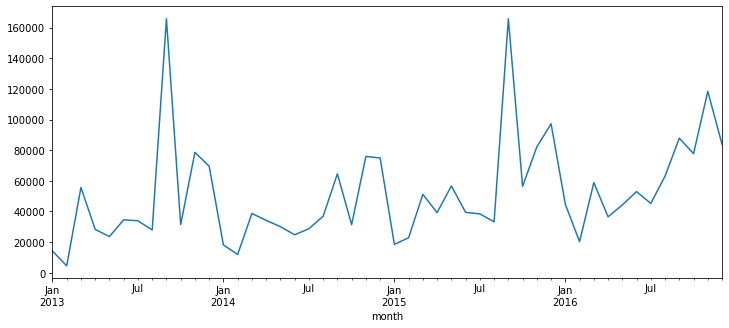

In [3]:
sales.plot(figsize=(12, 5))

Zero denominator in linear smooth. This usually indicates that the input contains duplicate points.


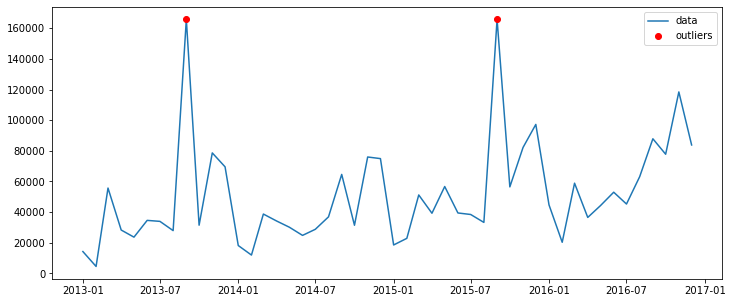

month
2013-09-01    165826.962
2015-09-01    165826.962
Name: sales, dtype: float64


In [5]:
ad = SmootherAD(seasadj=False)
outliers = ad.detect(sales)
ad.plot()
print(sales[outliers])

### 跟box plot方法对比

Series([], Name: sales, dtype: float64)


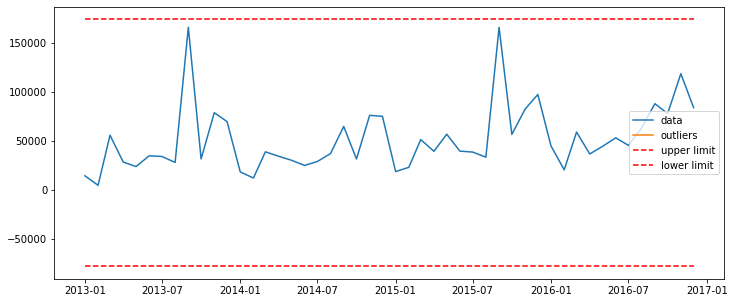

In [6]:
def box_plot(ts):
    from tsoutliers import box_method
    
    outliers, upper_limit, lower_limit = box_method(ts)
    print(ts[outliers])
    
    import matplotlib.pyplot as plt
    
    plt.plot(ts, label='data')
    plt.plot(ts[outliers], 'ro', label='outliers')
    plt.plot(ts.index, upper_limit * np.ones(len(ts)), 'r--', label='upper limit')
    plt.plot(ts.index, lower_limit * np.ones(len(ts)), 'r--', label='lower limit')
    
    plt.legend()
    plt.show()
    
    return

box_plot(sales)

## Average temperature India

<AxesSubplot:xlabel='date'>

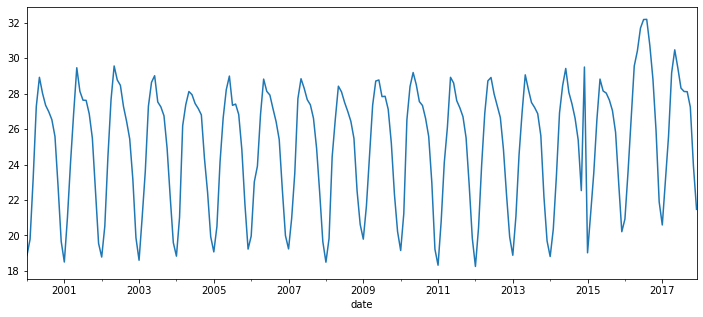

In [7]:
temp = pd.read_csv('./dataset/average_temp_india.csv', index_col='date', parse_dates=True)['values']
temp.plot()

### 对于明显的周期性数据，应该讲seasadj设置为True，不然对周期性时序的处理可能会失真

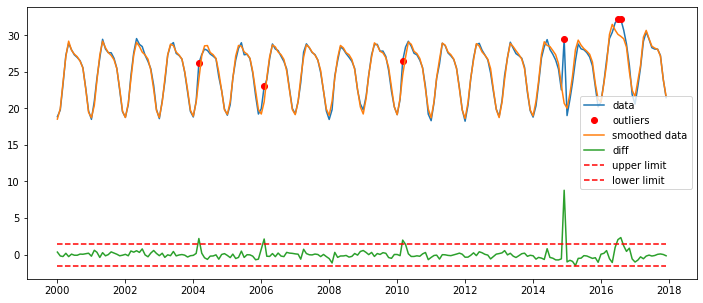

date
2004-03-01    26.19
2006-02-01    23.02
2010-03-01    26.53
2014-12-01    29.50
2016-07-01    32.18
2016-08-01    32.19
Name: values, dtype: float64


In [8]:
ad = SmootherAD(seasadj=True)
outliers = ad.detect(temp)
ad.plot(verbose=True)
print(temp[outliers])